In [2]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



In [3]:
df_DA_US = df[df['job_country'] == 'United States']

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_US = df_DA_US.dropna(subset = 'salary_year_avg')

In [5]:
job_titles = df_DA_US['job_title_short'].value_counts().index[:6].to_list()

In [6]:
df_US_top6 = df_DA_US[df_DA_US['job_title_short'].isin(job_titles)]

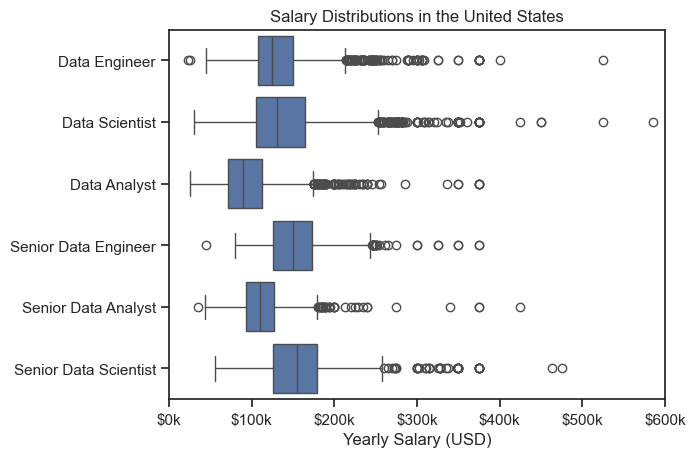

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme first
sns.set_theme(style='ticks')

# Create the boxplot
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short')

# Customize the plot
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')  # Empty y-axis label
plt.xlim(0, 600000)  # Corrected from plt.xlin to plt.xlim

# Format x-axis ticks to show in thousands
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()

In [14]:
df_DA_US = df_DA_US.explode('job_skills')

In [10]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

In [12]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_DA_US = df_DA_US.dropna(subset = 'salary_year_avg')

In [17]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)

In [18]:
df_DA_top_pay = df_DA_top_pay.head(10)

In [19]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills =df_DA_skills.head(10)

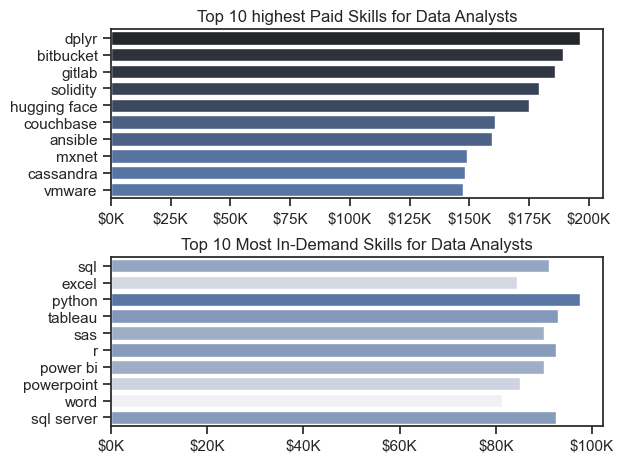

In [20]:
fig,ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay,x = 'median',y=df_DA_top_pay.index,hue = 'median',ax = ax[0],palette = 'dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

sns.barplot(data = df_DA_skills,x = 'median',y = df_DA_skills.index,hue ='median',ax=ax[1],palette = 'light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.tight_layout(h_pad= 0.7)
